In [32]:
import torch
import math
from collections import namedtuple

In [49]:
def T(alpha, a, d, theta):
    processed = list()
    for i in [torch.cos(theta), -torch.sin(theta), 0, a,
              torch.sin(theta)*torch.cos(alpha), torch.cos(theta)*torch.sin(alpha), -torch.sin(alpha), -d*torch.sin(alpha), 
              torch.sin(theta)*torch.sin(alpha), torch.cos(theta)*torch.sin(alpha), torch.cos(alpha), d*torch.cos(alpha),
              0,0,0,1]:
        if isinstance(i, (int, float)):
            processed.append(torch.tensor(i).view(1))
        else:
            processed.append(i.view(1))

    return torch.cat(tuple(processed)).view(4,4)

In [50]:
t1 = torch.tensor(0.0, requires_grad=True)
t2 = torch.tensor(0.0, requires_grad=True)
t3 = torch.tensor(0.0, requires_grad=True)
t4 = torch.tensor(0.0, requires_grad=True)
t5 = torch.tensor(0.0, requires_grad=True)
t6 = torch.tensor(0.0, requires_grad=True)
t7 = torch.tensor(0.0, requires_grad=True)

In [51]:
L0 = torch.tensor(270.35)
L1 = torch.tensor(69)
L2 = torch.tensor(364.35)
L3 = torch.tensor(69)
L4 = torch.tensor(374.39)
L5 = torch.tensor(10)
L6 = torch.tensor(368.30)

In [52]:
ModifiedDHParameterRow = namedtuple("ModifiedDHParameterRow", "alpha, a, d, theta")
a1=ModifiedDHParameterRow(torch.tensor(0.0),torch.tensor(0.0),torch.tensor(0.0),t1)
a2=ModifiedDHParameterRow(torch.tensor(-math.pi/4),L1,torch.tensor(0.0),t2+90.0)
a3=ModifiedDHParameterRow(torch.tensor(math.pi/4),torch.tensor(0.0),L2,t3)
a4=ModifiedDHParameterRow(torch.tensor(-math.pi/4),L3,torch.tensor(0.0),t4)
a5=ModifiedDHParameterRow(torch.tensor(math.pi/4),torch.tensor(0.0),L4,t5)
a6=ModifiedDHParameterRow(torch.tensor(-math.pi/4),L5,torch.tensor(0.0),t6)
a7=ModifiedDHParameterRow(torch.tensor(math.pi/4),torch.tensor(0.0),torch.tensor(0.0),t7)
def TForParamRow(row: ModifiedDHParameterRow):
    return T(row.alpha, row.a, row.d , row.theta)

In [53]:
T(*a1)

tensor([[1., -0., 0., 0.],
        [0., 0., -0., -0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]], grad_fn=<ViewBackward0>)

In [62]:
def forward_kinematics(a: [ModifiedDHParameterRow]):
    start = torch.tensor([0.0,0.0,0.0,1.0]).unsqueeze(1)
    net = start
    subTotals = [net]
    for row in a:
        transform = TForParamRow(row)
        net = transform @ net
        subTotals.append(net)
    return net

def forward_kinematics_stages(a: [ModifiedDHParameterRow]):
    start = torch.tensor([0.0,0.0,0.0,1.0]).unsqueeze(1)
    net = start
    subTotals = [net]
    for row in a:
        transform = TForParamRow(row)
        net = transform @ net
        subTotals.append(net)
    return subTotals
        

In [63]:
a = [a1,a2,a3,a4,a5,a6,a7]
forward_kinematics(a)

tensor([[1.4800e+02],
        [0.0000e+00],
        [1.0447e+03],
        [1.0000e+00]], grad_fn=<MmBackward0>)

In [69]:
nets = forward_kinematics_stages(a)
nets

[tensor([[0.],
         [0.],
         [0.],
         [1.]]),
 tensor([[0.],
         [0.],
         [0.],
         [1.]], grad_fn=<MmBackward0>),
 tensor([[69.],
         [ 0.],
         [ 0.],
         [ 1.]], grad_fn=<MmBackward0>),
 tensor([[  69.0000],
         [-257.6344],
         [ 257.6344],
         [   1.0000]], grad_fn=<MmBackward0>),
 tensor([[138.0000],
         [364.3500],
         [364.3500],
         [  1.0000]], grad_fn=<MmBackward0>),
 tensor([[ 138.0000],
         [-264.7337],
         [ 780.0024],
         [   1.0000]], grad_fn=<MmBackward0>),
 tensor([[148.0000],
         [738.7400],
         [738.7400],
         [  1.0000]], grad_fn=<MmBackward0>),
 tensor([[1.4800e+02],
         [0.0000e+00],
         [1.0447e+03],
         [1.0000e+00]], grad_fn=<MmBackward0>)]

In [55]:
T

<function __main__.T(alpha, a, d, theta)>

[0. 0. 0.]
[0. 0. 0.]
[69.  0.  0.]
[  69.      -257.63437  257.63437]
[138.   364.35 364.35]
[ 138.      -264.73367  780.00244]
[148.   738.74 738.74]
[ 148.        0.     1044.7361]


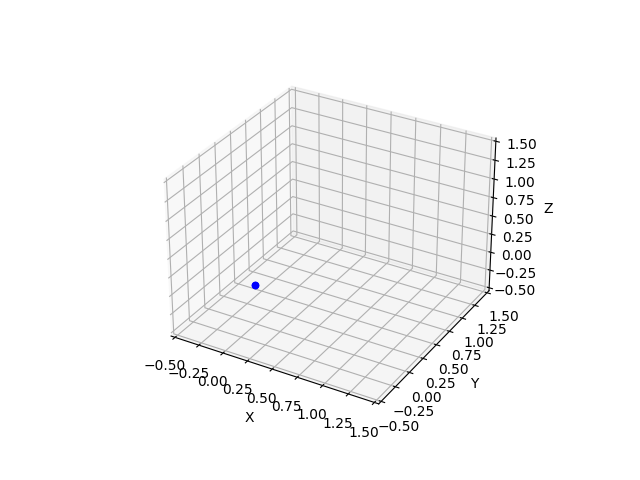

In [76]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([-0.5, 1.5])
ax.set_ylim([-0.5, 1.5])
ax.set_zlim([-0.5, 1.5])
for net in nets:
    net = net.detach().numpy()
    xyz = net[:, 0].T[:3]
    print(f"{xyz}")
    ax.scatter(xyz[0], xyz[1], xyz[2], color='blue')
    ax.plot(xyz[0], xyz[1], xyz[2], color='red')
plt.show()


In [93]:
nets
reshapedNets = torch.cat(nets).reshape(-1,4)
reshapedNets = reshapedNets.detach().numpy()


array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  1.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  1.0000000e+00],
       [ 6.9000000e+01,  0.0000000e+00,  0.0000000e+00,  1.0000000e+00],
       [ 6.9000000e+01, -2.5763437e+02,  2.5763437e+02,  1.0000000e+00],
       [ 1.3800000e+02,  3.6435001e+02,  3.6435001e+02,  1.0000000e+00],
       [ 1.3800000e+02, -2.6473367e+02,  7.8000244e+02,  1.0000000e+00],
       [ 1.4800000e+02,  7.3873999e+02,  7.3873999e+02,  1.0000000e+00],
       [ 1.4800000e+02,  0.0000000e+00,  1.0447361e+03,  1.0000000e+00]],
      dtype=float32)

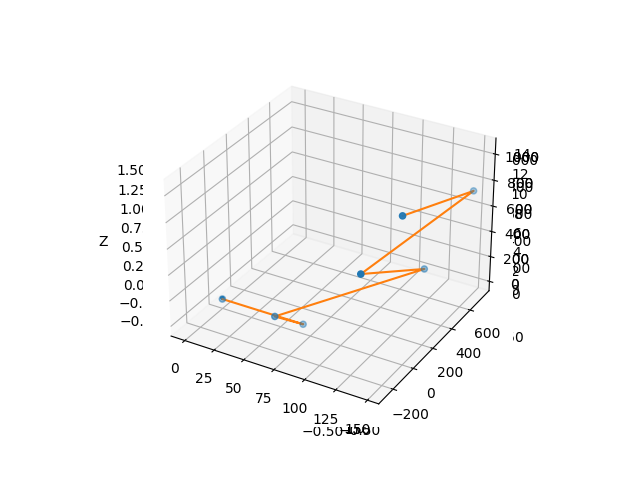

In [97]:
ax = plt.axes(projection='3d')# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline)
ax.scatter3D(reshapedNets[:,0], reshapedNets[:,1], reshapedNets[:,2])
ax.plot3D(reshapedNets[:,0], reshapedNets[:,1], reshapedNets[:,2])
plt.show()